# Prophet Multivariate

In [ ]:
!pip install fbprophet

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/nyc_energy_consumption.csv')

In [3]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
fig = px.line(df, x='timeStamp', y='demand', hover_data=['temp'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
ny_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8408ac3390>,
      dtype=object)

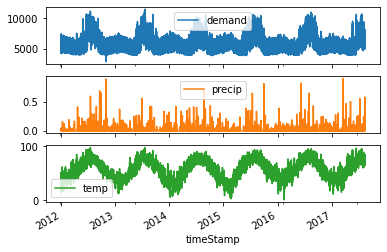

In [8]:
ny_df.plot(subplots=True)

In [9]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84081062d0>,
      dtype=object)

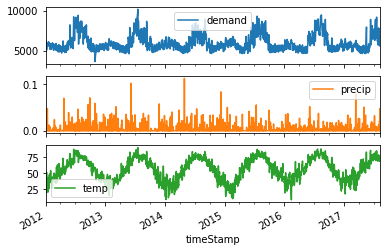

In [10]:
ny_df.resample('D').mean().plot(subplots=True)

In [11]:
ny_df_daily=ny_df.resample('D').mean()

In [12]:
from fbprophet import Prophet

In [13]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [14]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

In [15]:
ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


In [16]:
ny_df_final.query('temp != temp')

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [17]:
ny_df_final['temp']=ny_df_final['temp'].fillna(method='ffill')

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

In [18]:
ny_df_final['month']=ny_df_final['ds'].dt.month

In [19]:
ny_df_final.head()

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1


In [20]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [21]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             max        min       mean
month                                 
1      55.420455   9.507917  33.432140
2      59.360000   9.015000  34.517758
3      67.878333  20.291667  41.419884
4      72.992083  33.045833  52.600204
5      82.576250  48.090833  62.543994
6      86.916667  52.405833  71.334418
7      89.606667  66.417083  77.595627
8      87.426250  68.042083  75.525947
9      84.448750  57.274583  69.550306
10     74.277500  42.106250  58.642895
11     67.606250  27.172500  47.225638
12     64.735000  22.429583  41.520068

In [22]:
ny_df_final[['y','temp']].corr()

,y,temp
y,1.000000,0.560888
temp,0.560888,1.000000


In [23]:
ny_df_final.query('temp > 80')[['y','temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [24]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()

,y,temp
y,1.000000,0.470562
temp,0.470562,1.000000


In [26]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [27]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [28]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

In [29]:
ny_df_final

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [30]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-05-04')]
test=ny_df_final[(ny_df_final['ds'] > '2017-05-04')]

In [31]:
train.shape

(1951, 6)

In [32]:
test.shape

(100, 6)

In [33]:
test

,ds,y,temp,month,summer_temp,month_bins
1951,2017-05-05,5358.639500,55.720833,5,0,1
1952,2017-05-06,4850.361500,60.059583,5,0,1
1953,2017-05-07,4668.315958,52.448333,5,0,1
1954,2017-05-08,5244.323958,52.050833,5,0,1
1955,2017-05-09,5274.153125,53.748750,5,0,1
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [34]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [35]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [36]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
m.params

{'beta': array([[-0.0355096 , -0.0590069 ,  0.04943532,  0.0401239 , -0.009489  ,
         -0.00175174, -0.00781407, -0.00251255,  0.00344636, -0.00583575,
          0.00141009,  0.00304563, -0.0052534 , -0.00378094,  0.00338453,
         -0.00276377,  0.00072471,  0.00142912, -0.00131726, -0.00029859,
         -0.02720549,  0.02410432,  0.02030053,  0.00148954, -0.00495091,
         -0.00518757,  0.13422086, -0.00937257]]),
 'delta': array([[-3.00686362e-07, -4.99681713e-07, -2.51981729e-01,
          2.06570303e-08,  2.99723143e-06,  3.74265402e-02,
          1.02345415e-02,  1.25657016e-02,  2.58520813e-06,
         -1.20091022e-08, -9.52802492e-08, -6.30470906e-02,
         -4.65352777e-07,  3.47897312e-08,  1.71375979e-01,
          2.28911392e-06, -1.83670868e-07, -1.50014727e-01,
         -1.21231139e-02, -2.14996753e-07,  4.87661380e-08,
          2.41311328e-07,  5.57076184e-02,  1.12970469e-02,
         -1.21070010e-07]]),
 'k': array([[0.19054809]]),
 'm': array([[0.58662148

In [38]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [41]:
future['summer_temp'] = ny_df_final['summer_temp']

In [39]:
future['month_bins'] = ny_df_final['month_bins']

In [42]:
future

,ds,month_bins,summer_temp
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,1,0
2047,2017-08-09,1,0
2048,2017-08-10,1,0
2049,2017-08-11,1,0


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7380.098898,6557.948102,8191.220341
2047,2017-08-09,7389.575381,6622.692217,8181.949691
2048,2017-08-10,7359.496148,6650.753832,8161.842146
2049,2017-08-11,7310.194252,6568.152038,8079.527168
2050,2017-08-12,6729.278749,5971.859229,7472.513253


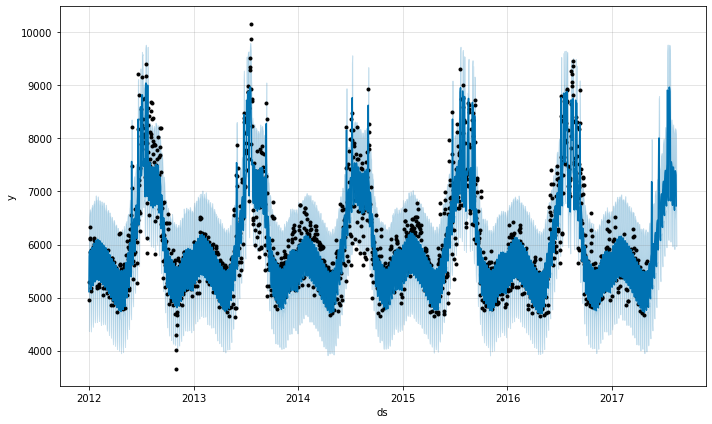

In [44]:
fig1 = m.plot(forecast)

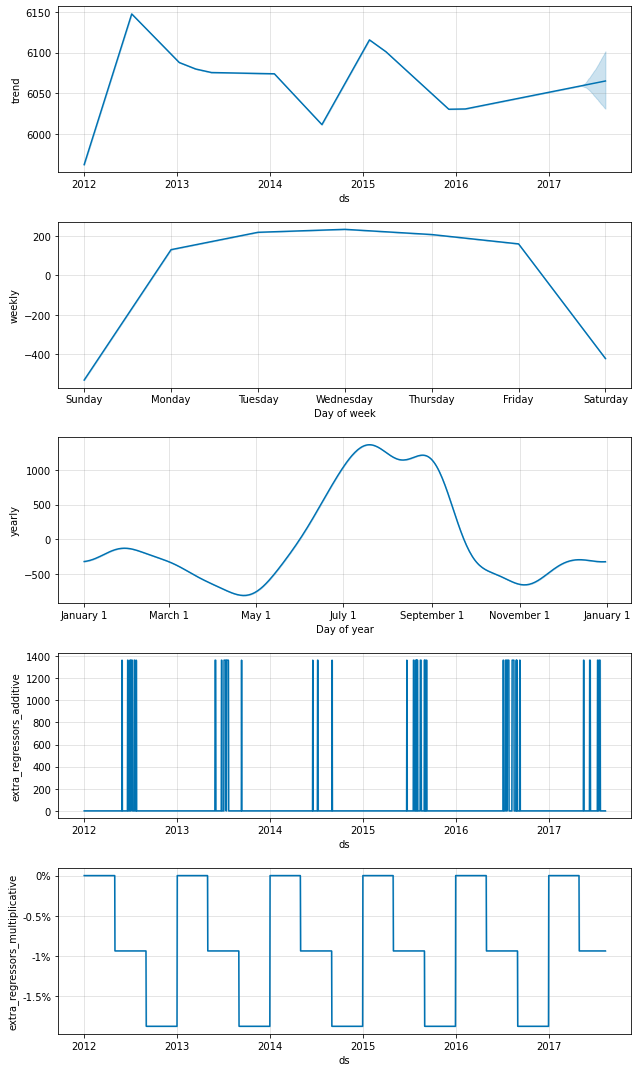

In [45]:
fig2 = m.plot_components(forecast)

In [46]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-05 00:00:00 and 2016-05-04 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,215208.960639,463.906198,367.228823,0.064448,0.051956,0.890110
1,37 days 00:00:00,222727.278566,471.939910,375.828019,0.065669,0.053344,0.884615
2,37 days 12:00:00,223937.167425,473.219999,378.727908,0.066158,0.054962,0.884615
3,38 days 00:00:00,235705.659258,485.495272,387.670299,0.067291,0.056989,0.879121
4,38 days 12:00:00,236532.194971,486.345757,389.854902,0.067678,0.058344,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,138819.506414,372.584898,311.686332,0.057843,0.058440,0.983516
654,363 days 12:00:00,138839.460619,372.611675,311.844136,0.057826,0.058440,0.983516
655,364 days 00:00:00,138428.423626,372.059704,310.439225,0.057565,0.058865,0.983516
656,364 days 12:00:00,138517.502169,372.179395,310.545509,0.057585,0.058865,0.983516


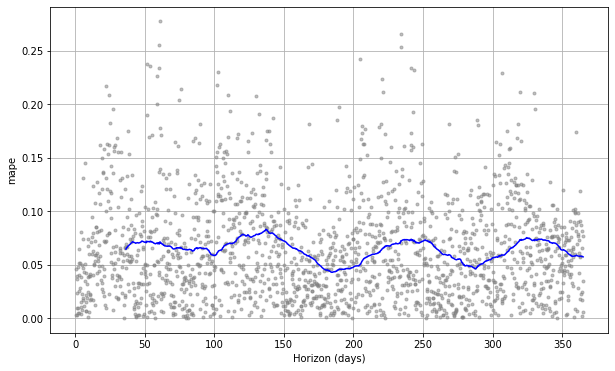

In [47]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')